In [127]:
from glob import glob
import geopandas as gp
import numpy as np
import pandas as pd
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import random
import os
from scipy.signal import savgol_filter

pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore")

try:
    if kernel_is_loaded:
        pass
except:
    os.chdir('/'.join(os.getcwd().split('/')[:-1]))
    kernel_is_loaded = True

In [128]:
def seed_everything(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    
seed_everything()

In [129]:
class data_pipeline_1:
    def __init__(self):
        pass
        
    def get_data(self,row):
        lst = deepcopy(row)
        vals=[]
        act_strt_idx = lst.index.get_loc(row['sowing_period'])
        for i in range(len(lst.loc[row['sowing_period']:row['harvest_period']])+1):
            actual_idx = i + act_strt_idx
            vals.append(lst[actual_idx])
        return vals
        
    def generate_data(self,df):
        min_columns = 15
        df_refined = df.apply(self.get_data, axis=1)
        # Create a dictionary with 14 columns filled with zeros
        data = {i: [0] * len(df_refined) for i in range(1,15)}
        data ['last_fortnight'] = [0]*len(df_refined)
        
        # Create the DataFrame
        df_1 = pd.DataFrame(data)
        
        for index, lst in enumerate(df_refined):
            min_columns = min(min_columns, len(lst))
            if index < df_1.shape[0]:
                size = len(lst)
                lst += [0] * (df_1.shape[1] - len(lst)-1)
                lst.append(size)
                # print(lst)
                df_1.iloc[index] = lst

        df_1['sowing-harvest'] = df['sowing_period']+'-'+ df['harvest_period']
        
        return (df_1,min_columns)
    def display_data(self , df):
        columns = [i for i in range(1,15)]

        # Apply Savitzky-Golay filter to each row and plot subplots based on 'sowing_period'
        window_length = 5  # Adjust this value as needed
        polyorder = 2  # Adjust this value as needed
        
        # Get unique categories based on 'sowing_period'
        categories = [i for i in range (1,14)]
        
        # Determine the number of rows and columns for subplots
        num_categories = len(categories)
        num_rows = (num_categories + 1) // 2  # Round up to ensure enough rows
        num_cols = 2
        
        # Create subplots for each category in a 2-column layout
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))
        
        # Flatten the 2D array of subplots into a 1D array
        axes = axes.flatten()
        
        # Plot data for each category
        for i, category in enumerate(categories):
                category_data = df[(df[category] != 0) & (df[category+1] == 0)].loc[:, 1:category]
                rows = len(category_data)
                category_data = category_data.sample(rows,random_state=42)
            
                # Plot the smoothed data for the category
                axes[i].plot(category_data.T, alpha=0.7)
                axes[i].set_title(f'{category}_values')
                axes[i].set_xticks(np.arange(1, len(columns)+1, 1))
                axes[i].set_xticklabels(columns, rotation=45, ha='right')
                axes[i].set_yticks(np.arange(60, 220, 10))
                axes[i].set_ylim([100, 200])
        
        # Hide any remaining empty subplots
        for j in range(num_categories, num_rows * num_cols):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

In [130]:
pipeline = data_pipeline_1()

In [131]:
potato = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_potato.csv')
output = pipeline.generate_data(potato)
potato = output[0]
print(output[1])
display(potato.head(3))

5


1    2    3      4      5      6      7    8  9  10  11  12  13  14  \
0  118  159  173  176.0  184.0  178.0  159.0  118  0   0   0   0   0   0   
1  113  152  178  188.0  183.5  179.0  170.0  132  0   0   0   0   0   0   
2  109  150  182  187.0  184.5  182.0  157.0  125  0   0   0   0   0   0   

   last_fortnight   sowing-harvest  
0               8  Nov_2FN-Feb_2FN  
1               8  Nov_1FN-Feb_1FN  
2               8  Nov_1FN-Feb_1FN

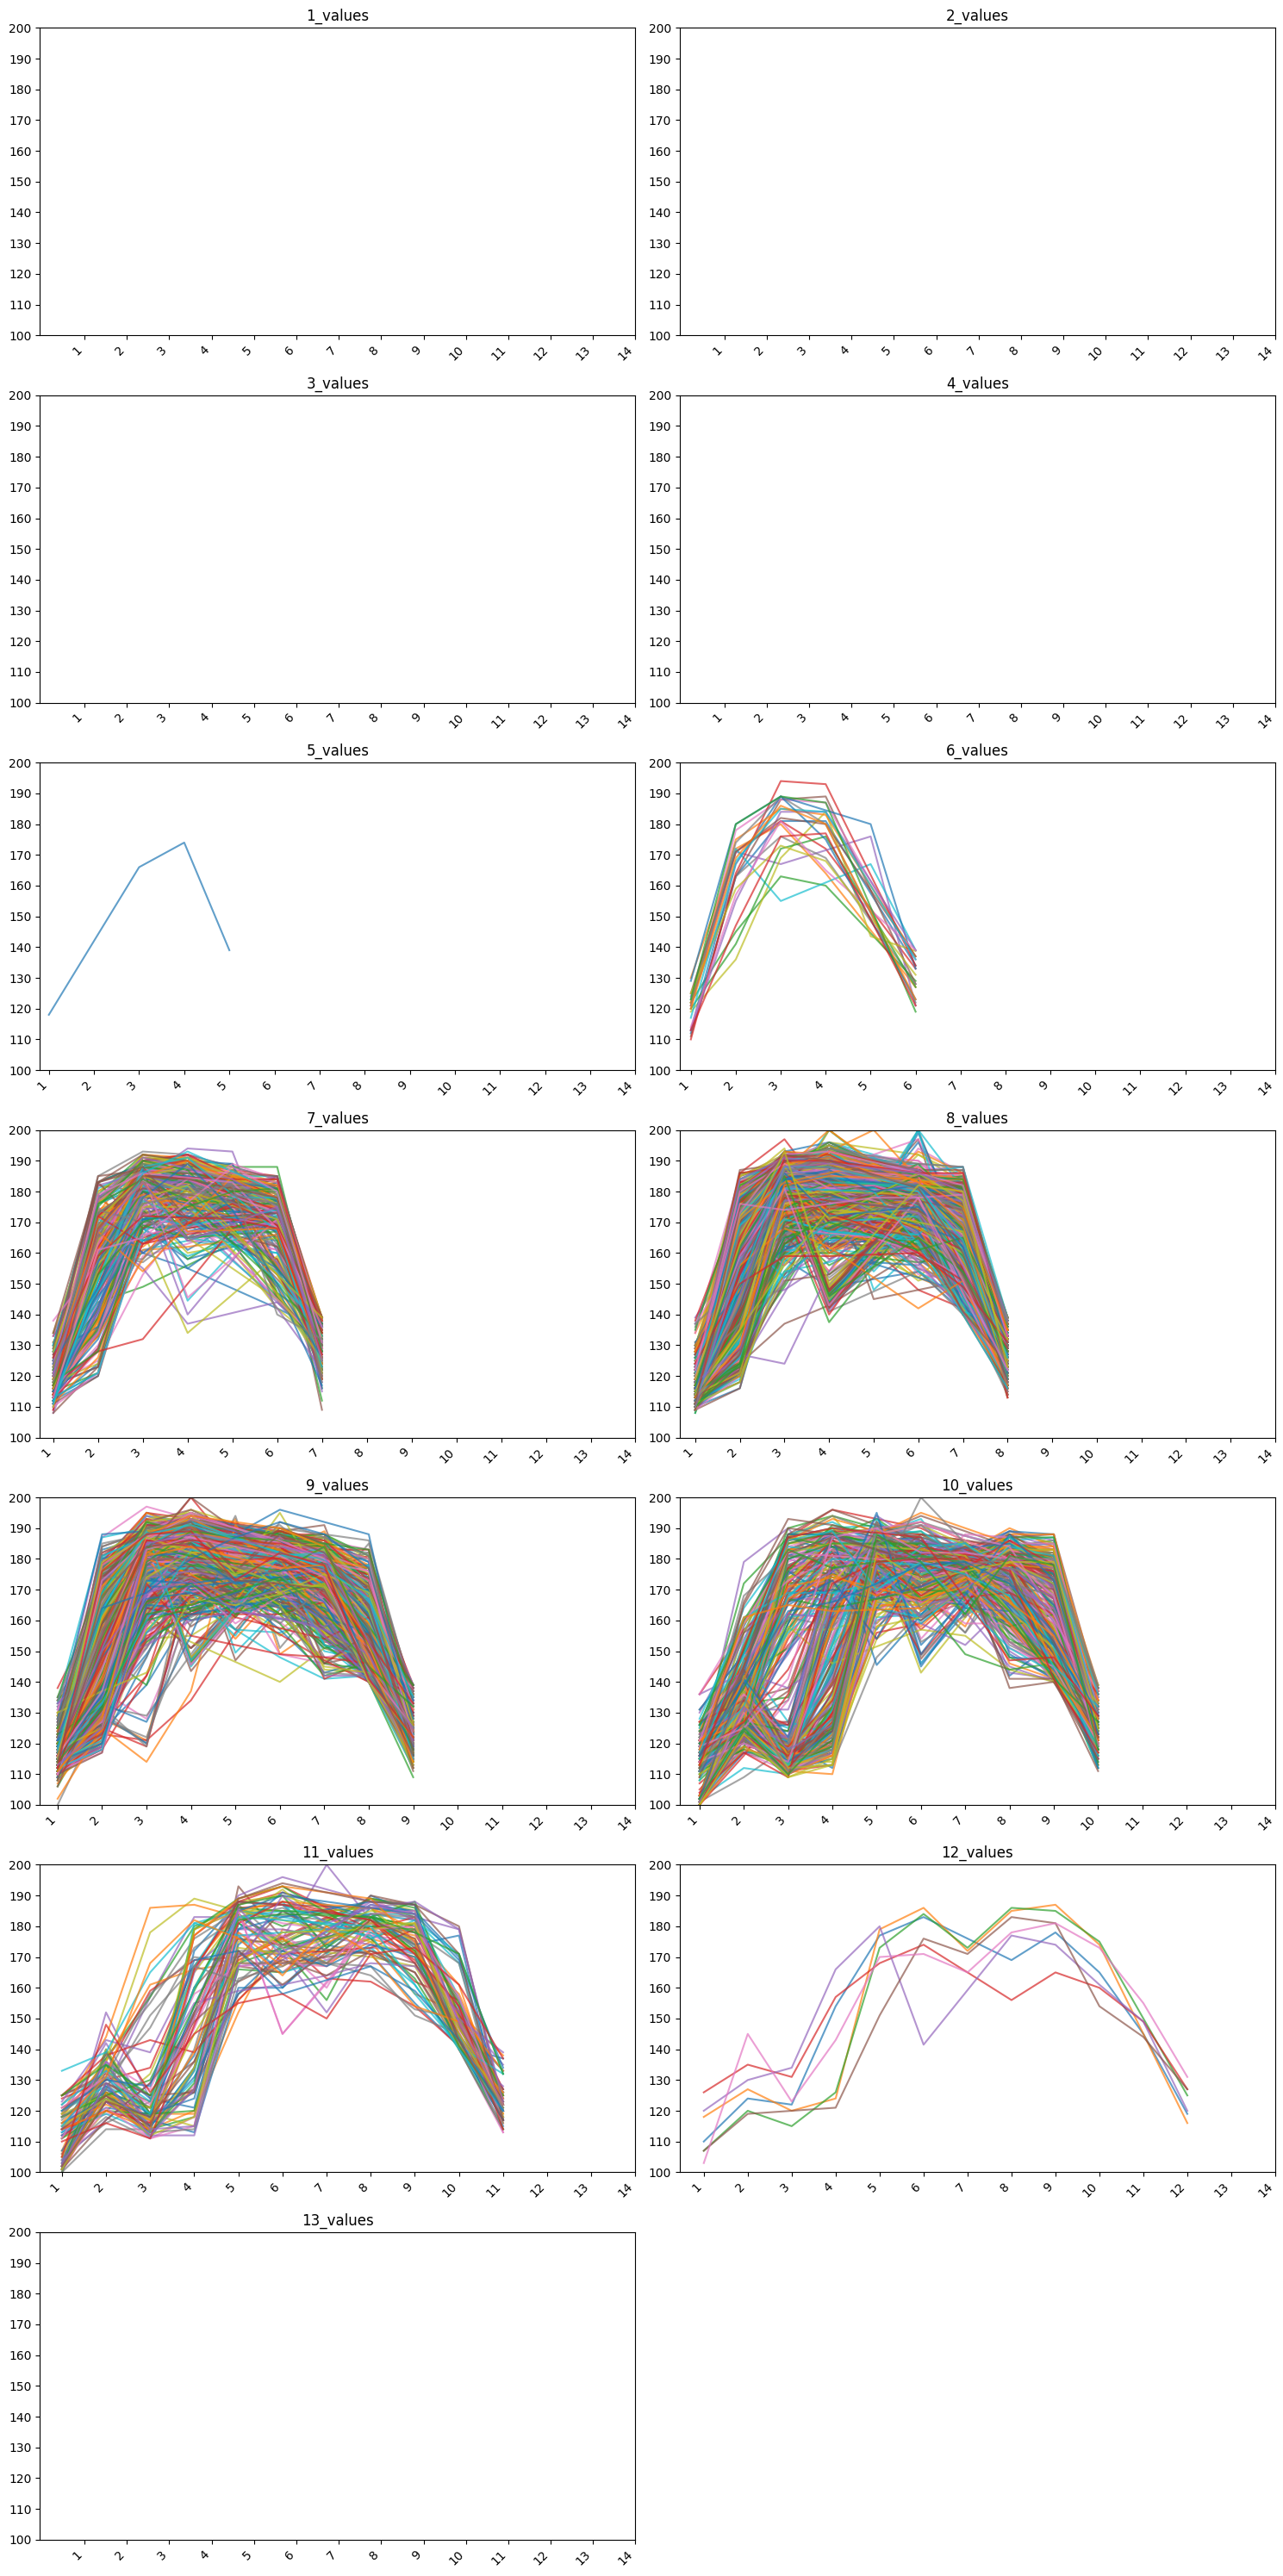

In [132]:
pipeline.display_data(potato)

In [133]:
potato = potato[potato['last_fortnight']!=5]

In [134]:
wheat = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_wheat.csv')
output = pipeline.generate_data(wheat)
wheat = output[0]
print(output[1])
display(wheat.head(3))

7


1    2    3      4      5    6    7    8    9  10  11  12  13  14  \
0  117  154  185  186.0  191.0  191  185  177  131   0   0   0   0   0   
1  118  153  172  182.0  189.0  181  173  157  124   0   0   0   0   0   
2  119  159  186  190.0  193.0  191  178  144  122   0   0   0   0   0   

   last_fortnight sowing-harvest  
0               9  oct_2f-feb_1f  
1               9  oct_2f-feb_1f  
2               9  oct_2f-feb_1f

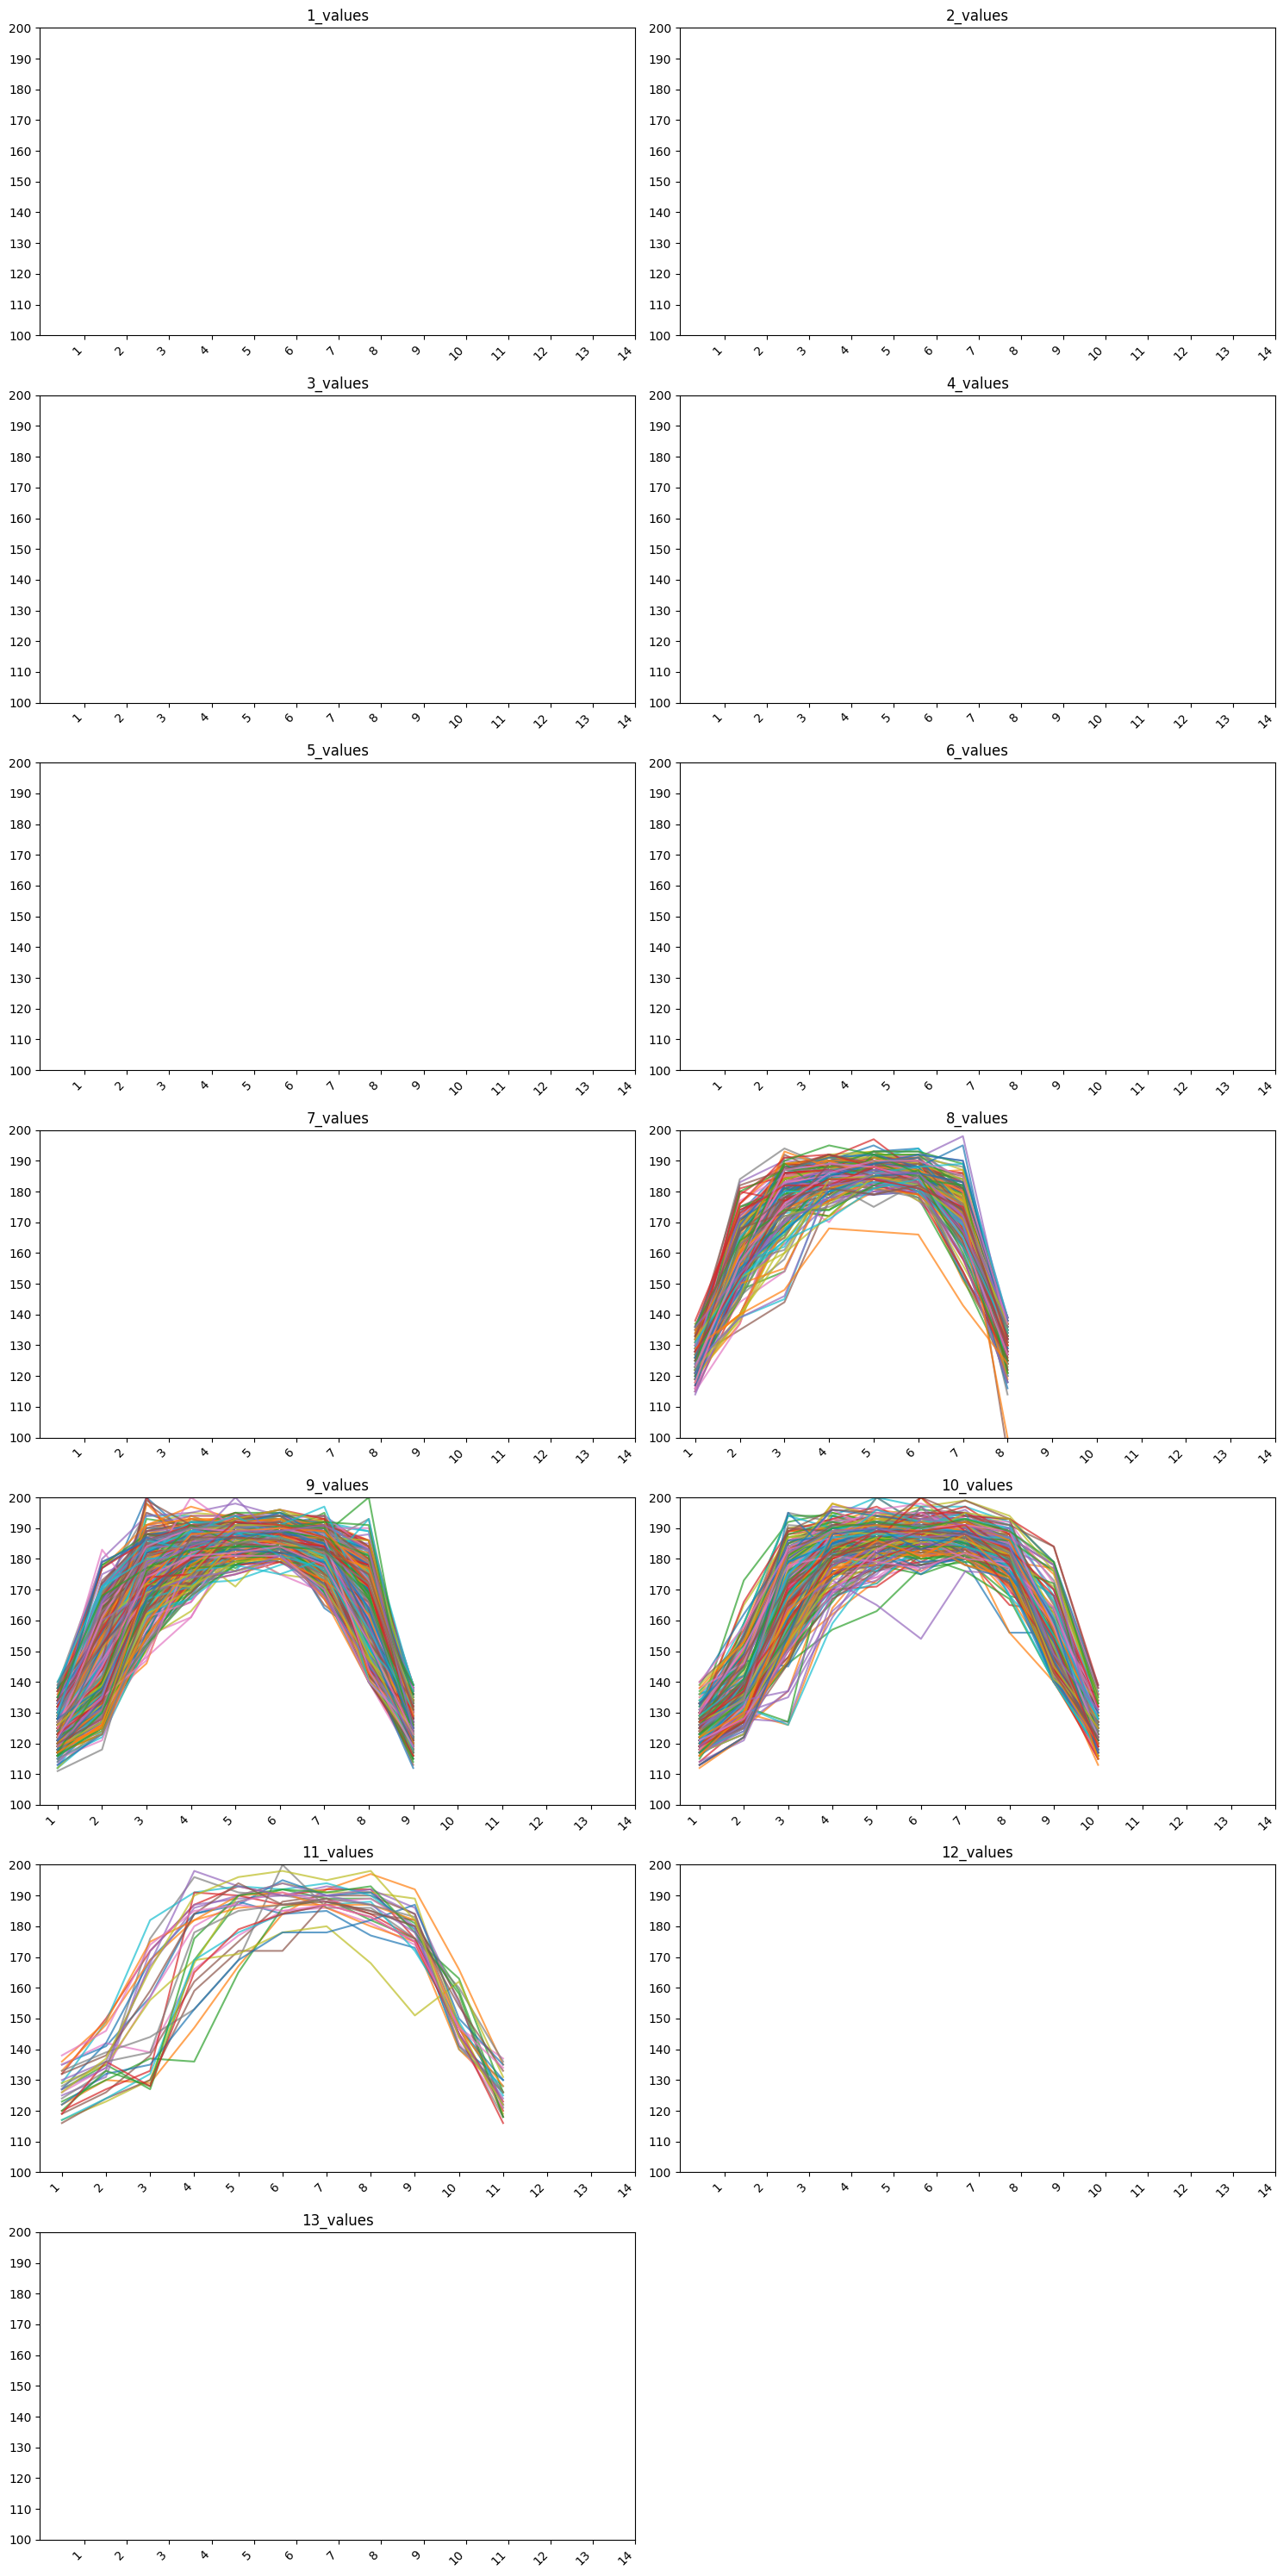

In [135]:
pipeline.display_data(wheat.sample(1000,random_state=42))

In [136]:
mustard = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_mustard.csv')
output = pipeline.generate_data(mustard)
mustard = output[0]
print(output[1])
display(mustard.head(3))

7


1    2    3      4      5      6    7    8    9   10  11  12  13  14  \
0  117  130  183  186.0  183.0  188.0  184  184  165  131   0   0   0   0   
1  121  151  190  191.0  188.0  186.0  189  187  168  138   0   0   0   0   
2  128  176  178  183.0  186.0  200.0  182  170  146  134   0   0   0   0   

   last_fortnight sowing-harvest  
0              10  oct_2f-feb_2f  
1              10  oct_2f-feb_2f  
2              10  nov_1f-mar_1f

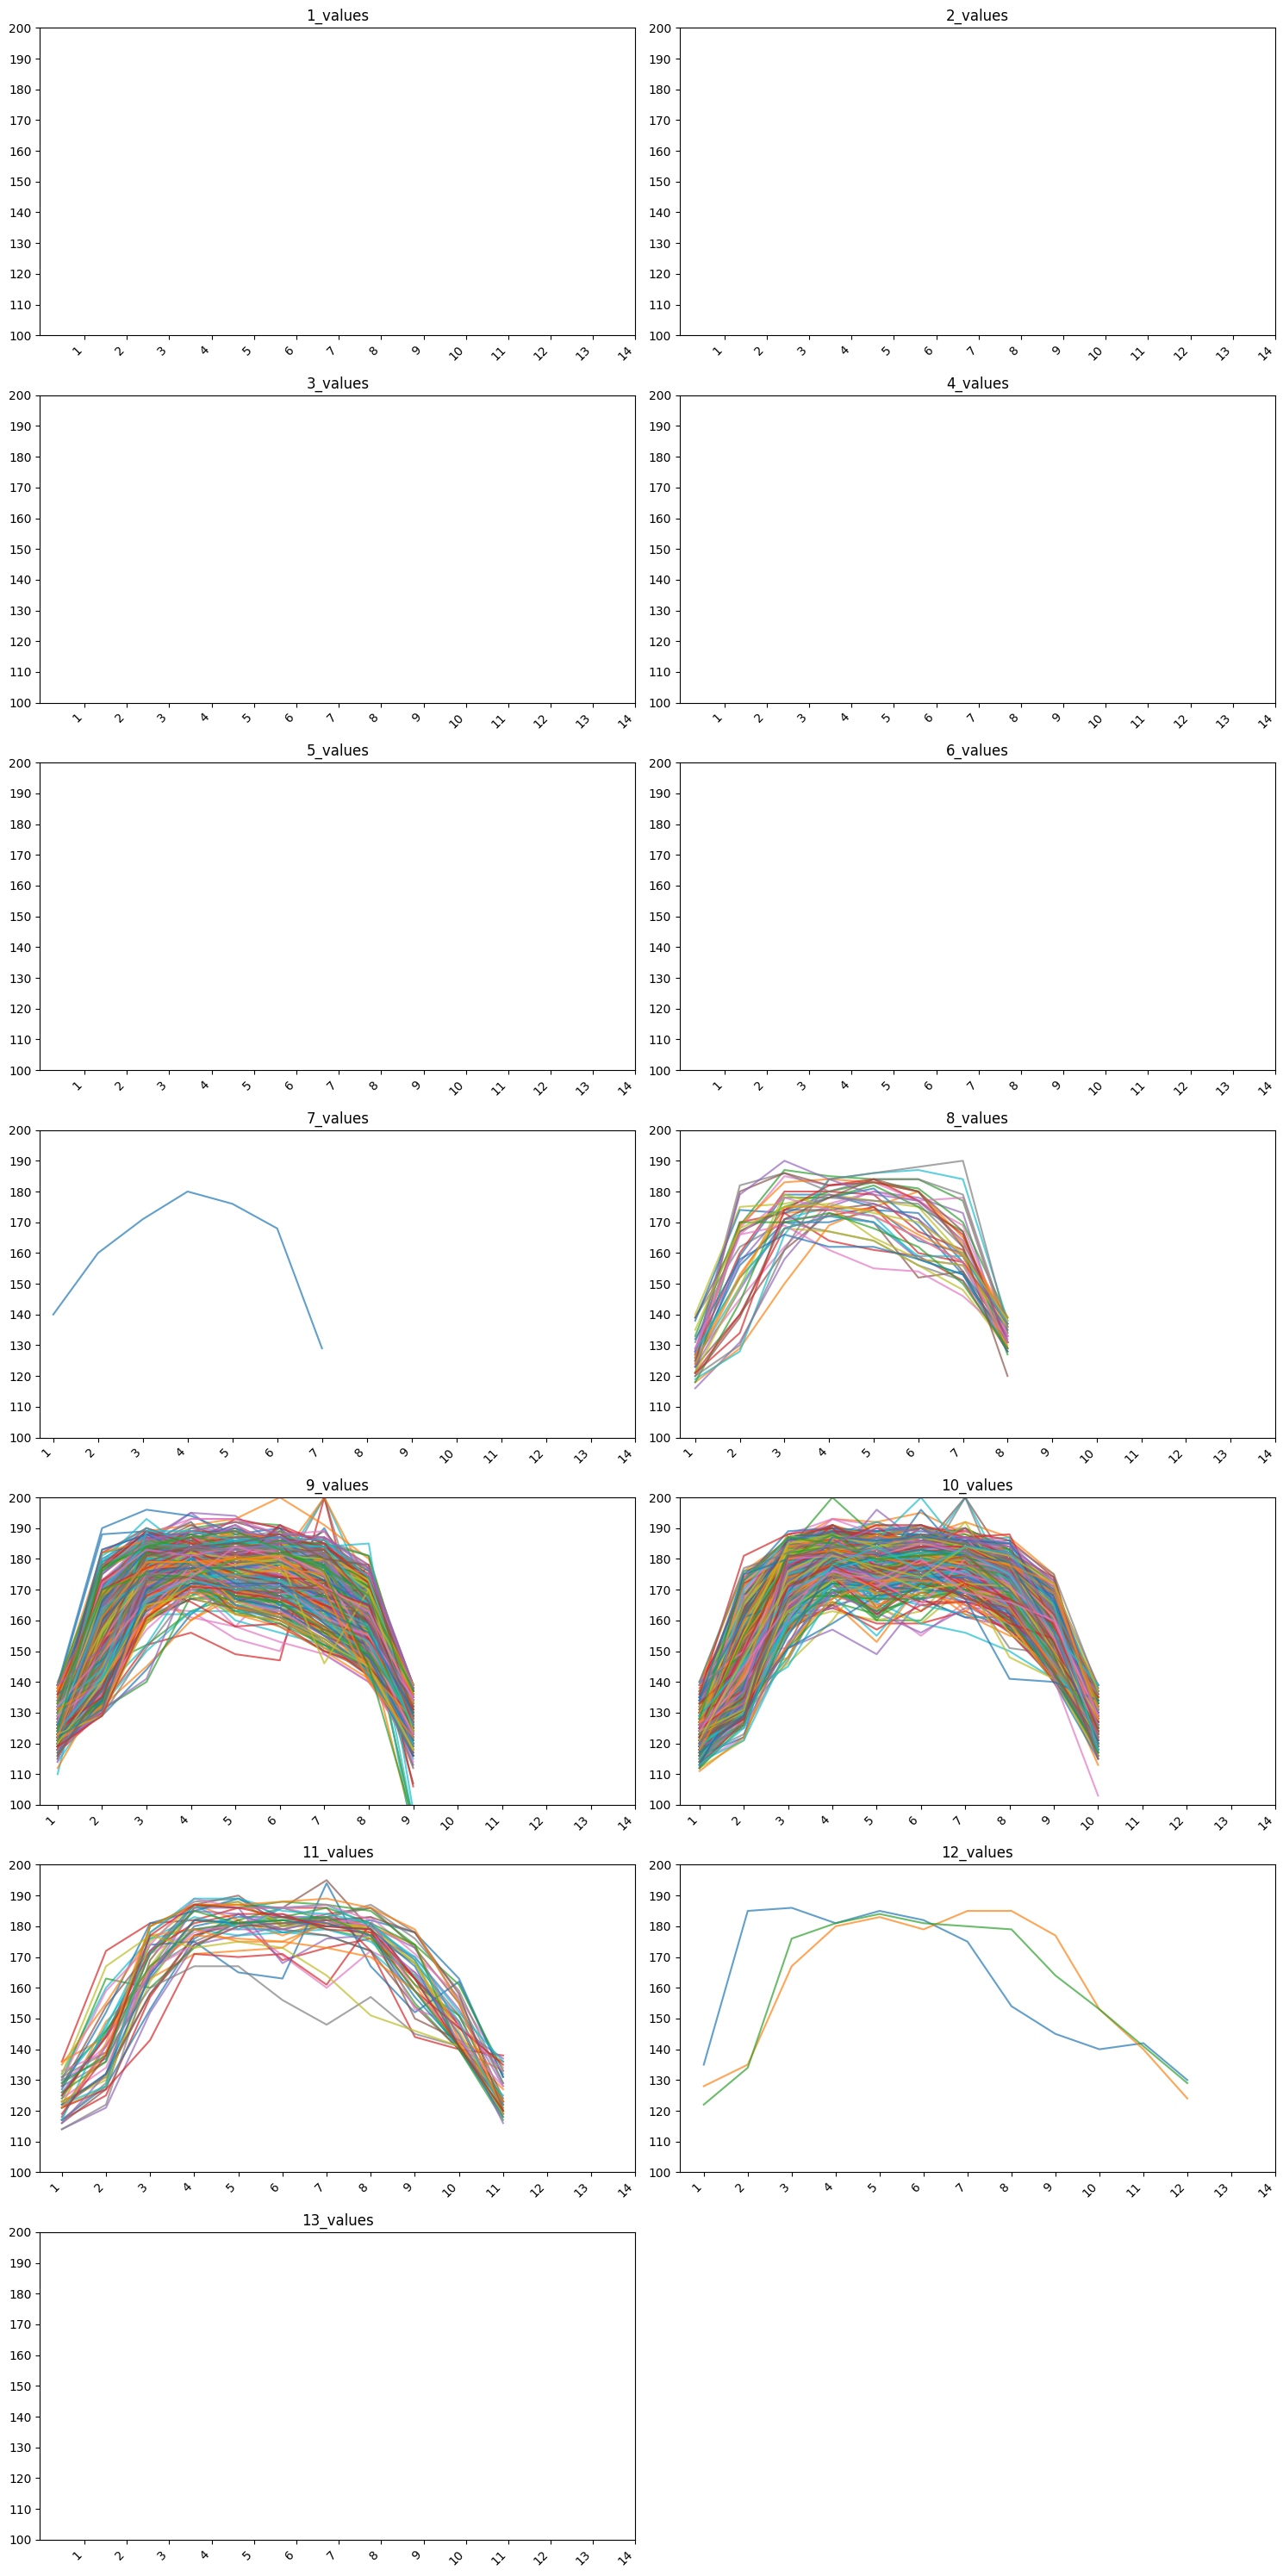

In [137]:
pipeline.display_data(mustard.sample(1000,random_state=42))

In [138]:
rice = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_rice.csv')
output = pipeline.generate_data(rice)
rice = output[0]
print(output[1])
display(rice.head(3))

7


1    2    3    4    5    6    7    8    9   10   11   12  13  14  \
0  121  130  135  161  170  172  167  158  137    0    0    0   0   0   
1  126  137  153  178  181  182  182  177  142  121  143  138   0   0   
2  124  149  159  173  172  173  180  176  146  125    0    0   0   0   

   last_fortnight sowing-harvest  
0               9  jan_2f-may_1f  
1              12  dec_2f-may_2f  
2              10  dec_2f-apr_2f

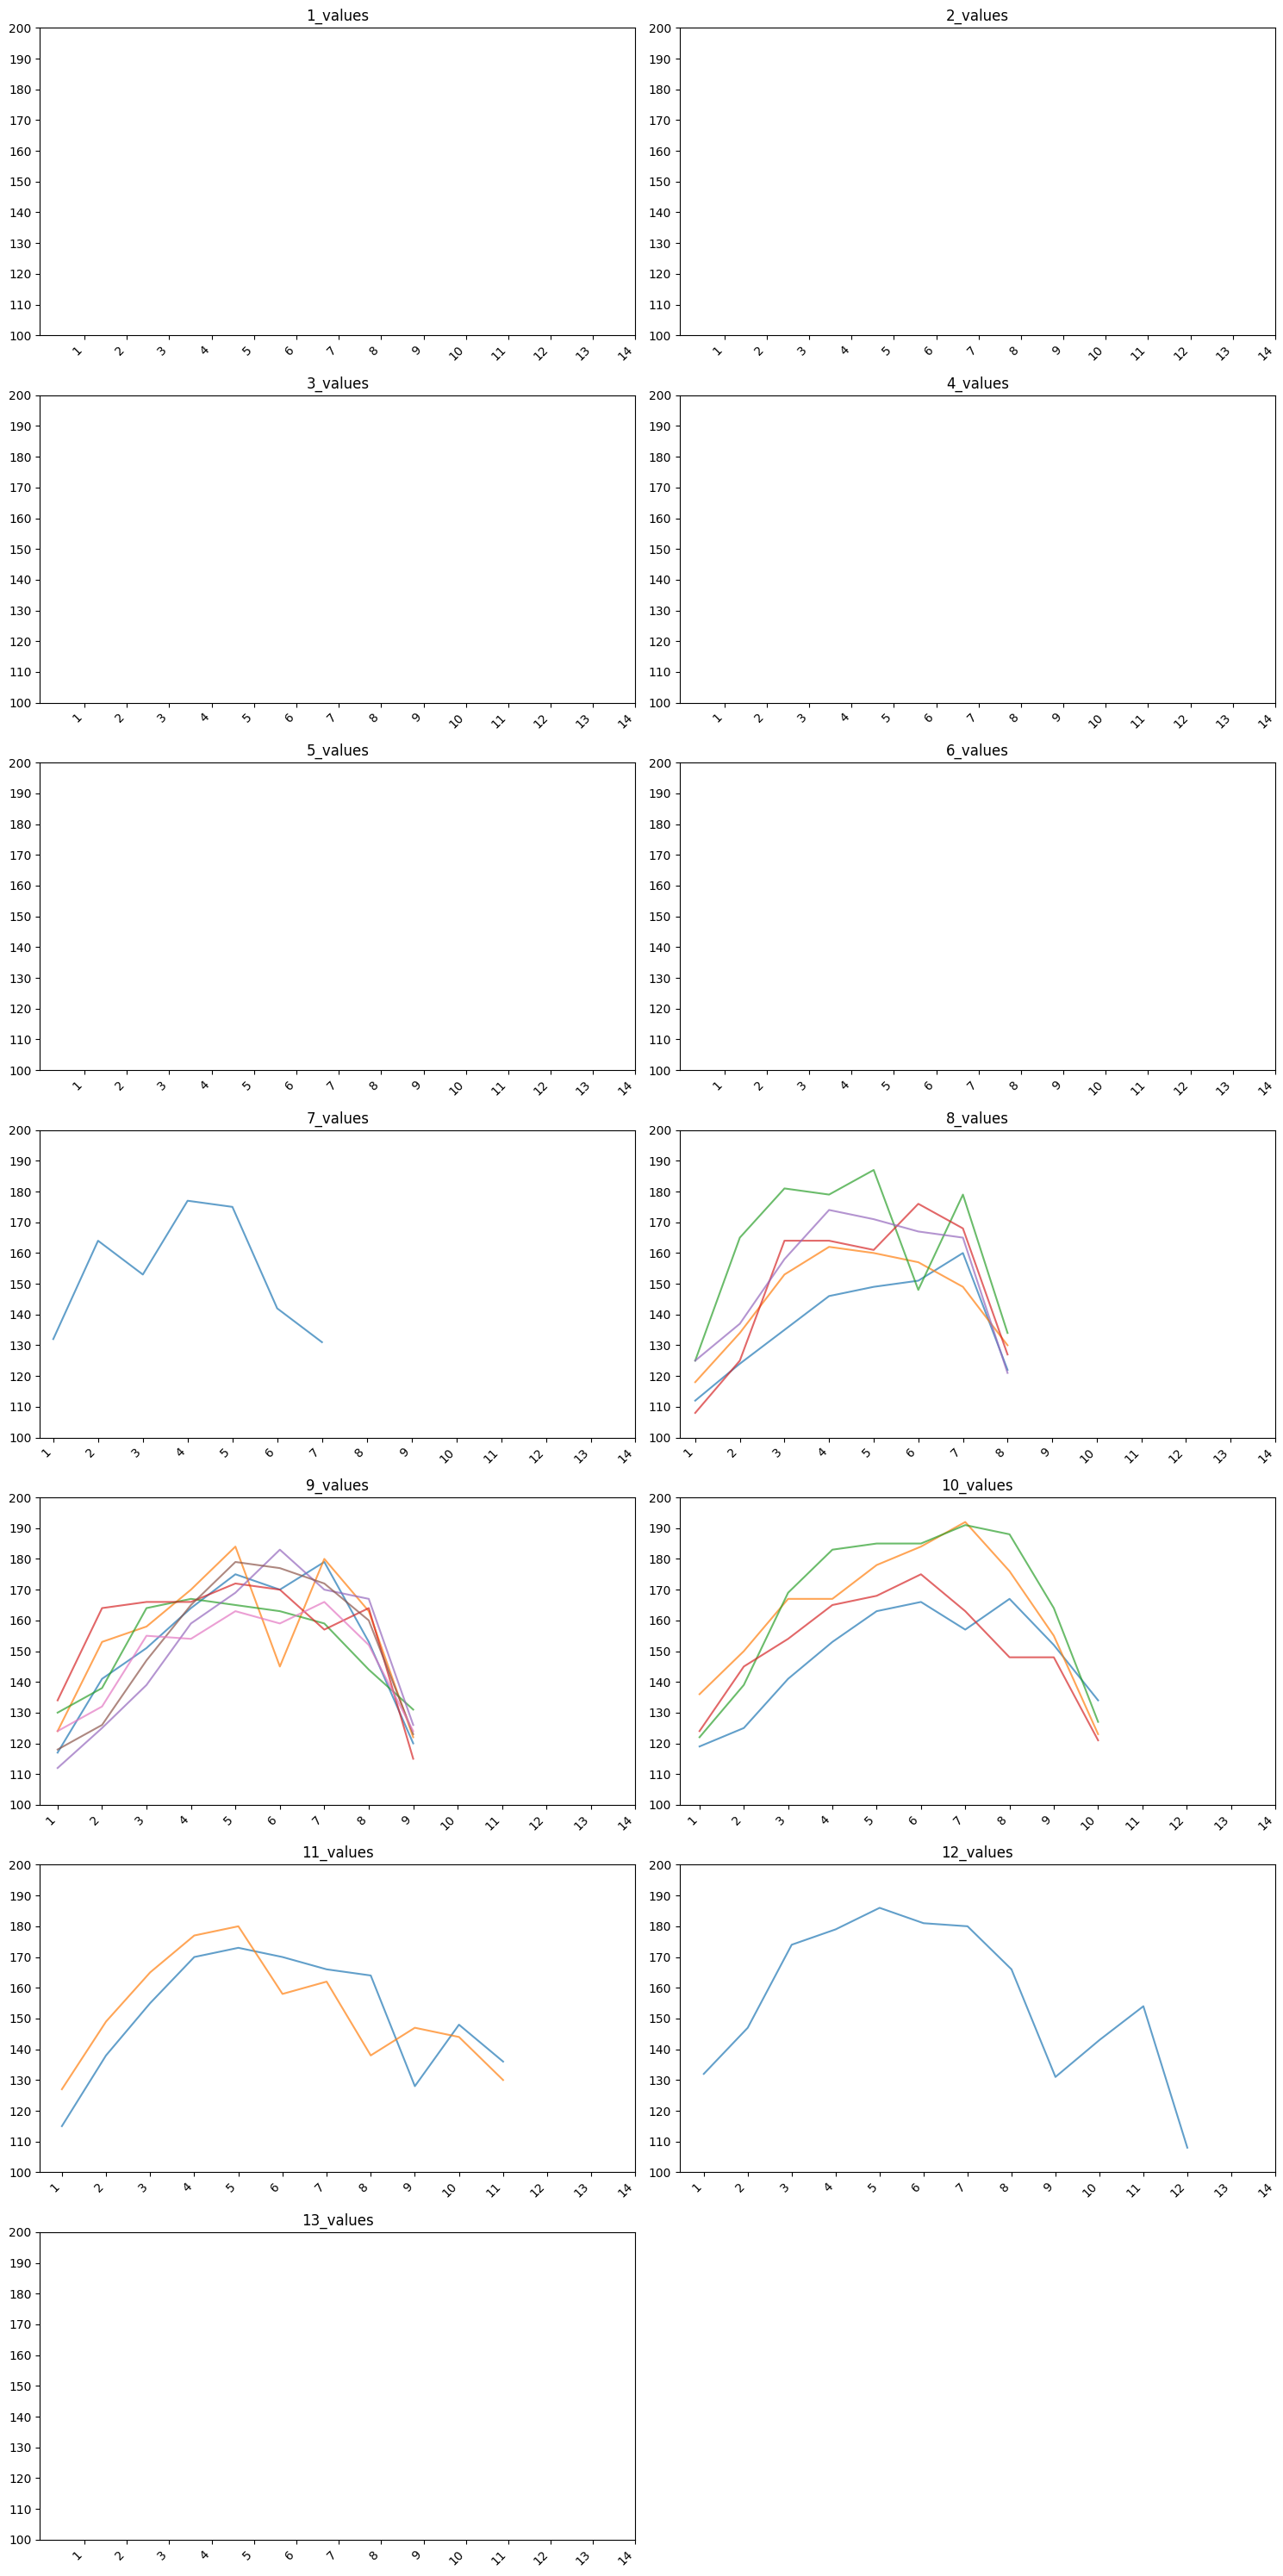

In [139]:
pipeline.display_data(rice.sample(20,random_state=42))

In [140]:
display(wheat.head(),mustard.head(),potato.head(),rice.head())

1    2    3      4      5    6    7    8    9  10  11  12  13  14  \
0  117  154  185  186.0  191.0  191  185  177  131   0   0   0   0   0   
1  118  153  172  182.0  189.0  181  173  157  124   0   0   0   0   0   
2  119  159  186  190.0  193.0  191  178  144  122   0   0   0   0   0   
3  119  158  186  190.0  193.0  191  178  146  121   0   0   0   0   0   
4  119  151  184  190.0  189.0  188  186  170  132   0   0   0   0   0   

   last_fortnight sowing-harvest  
0               9  oct_2f-feb_1f  
1               9  oct_2f-feb_1f  
2               9  oct_2f-feb_1f  
3               9  oct_2f-feb_1f  
4               9  oct_2f-feb_1f

1    2    3      4      5      6    7    8    9   10   11   12  13  14  \
0  117  130  183  186.0  183.0  188.0  184  184  165  131    0    0   0   0   
1  121  151  190  191.0  188.0  186.0  189  187  168  138    0    0   0   0   
2  128  176  178  183.0  186.0  200.0  182  170  146  134    0    0   0   0   
3  122  134  176  181.0  184.0  181.0  180  179  164  153  141  129   0   0   
4  119  151  185  188.0  180.0  181.0  184  177  156  143  115    0   0   0   

   last_fortnight sowing-harvest  
0              10  oct_2f-feb_2f  
1              10  oct_2f-feb_2f  
2              10  nov_1f-mar_1f  
3              12  oct_2f-mar_2f  
4              11  nov_1f-mar_2f

1    2    3      4      5      6      7    8    9  10  11  12  13  14  \
0  118  159  173  176.0  184.0  178.0  159.0  118    0   0   0   0   0   0   
1  113  152  178  188.0  183.5  179.0  170.0  132    0   0   0   0   0   0   
2  109  150  182  187.0  184.5  182.0  157.0  125    0   0   0   0   0   0   
3  112  158  189  193.0  188.0  183.0  161.0  127    0   0   0   0   0   0   
4  112  157  172  171.0  167.5  164.0  146.0  149  116   0   0   0   0   0   

   last_fortnight   sowing-harvest  
0               8  Nov_2FN-Feb_2FN  
1               8  Nov_1FN-Feb_1FN  
2               8  Nov_1FN-Feb_1FN  
3               8  Nov_1FN-Feb_1FN  
4               9  Nov_1FN-Feb_2FN

1    2    3    4    5    6    7    8    9   10   11   12  13  14  \
0  121  130  135  161  170  172  167  158  137    0    0    0   0   0   
1  126  137  153  178  181  182  182  177  142  121  143  138   0   0   
2  124  149  159  173  172  173  180  176  146  125    0    0   0   0   
3  129  142  146  159  161  163  169  166  137    0    0    0   0   0   
4  122  142  158  161  166  163  134    0    0    0    0    0   0   0   

   last_fortnight sowing-harvest  
0               9  jan_2f-may_1f  
1              12  dec_2f-may_2f  
2              10  dec_2f-apr_2f  
3               9  dec_2f-apr_1f  
4               7  feb_1f-apr_2f

In [141]:
wheat['crop'] = 1
mustard['crop'] = 0
potato['crop'] = 2
rice['crop'] = 3

In [142]:
data = pd.concat([wheat,mustard,potato,rice])

In [143]:
data.head()

1    2    3      4      5      6      7    8    9  10  11  12  13  14  \
0  117  154  185  186.0  191.0  191.0  185.0  177  131   0   0   0   0   0   
1  118  153  172  182.0  189.0  181.0  173.0  157  124   0   0   0   0   0   
2  119  159  186  190.0  193.0  191.0  178.0  144  122   0   0   0   0   0   
3  119  158  186  190.0  193.0  191.0  178.0  146  121   0   0   0   0   0   
4  119  151  184  190.0  189.0  188.0  186.0  170  132   0   0   0   0   0   

   last_fortnight sowing-harvest  crop  
0               9  oct_2f-feb_1f     1  
1               9  oct_2f-feb_1f     1  
2               9  oct_2f-feb_1f     1  
3               9  oct_2f-feb_1f     1  
4               9  oct_2f-feb_1f     1

In [144]:
data.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/four_crop_data.csv',index = False)

In [145]:
data  = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/four_crop_data.csv')
data.head()

1    2    3      4      5      6      7    8    9  10  11  12  13  14  \
0  117  154  185  186.0  191.0  191.0  185.0  177  131   0   0   0   0   0   
1  118  153  172  182.0  189.0  181.0  173.0  157  124   0   0   0   0   0   
2  119  159  186  190.0  193.0  191.0  178.0  144  122   0   0   0   0   0   
3  119  158  186  190.0  193.0  191.0  178.0  146  121   0   0   0   0   0   
4  119  151  184  190.0  189.0  188.0  186.0  170  132   0   0   0   0   0   

   last_fortnight sowing-harvest  crop  
0               9  oct_2f-feb_1f     1  
1               9  oct_2f-feb_1f     1  
2               9  oct_2f-feb_1f     1  
3               9  oct_2f-feb_1f     1  
4               9  oct_2f-feb_1f     1

In [146]:
data[data['crop']==2 ].last_fortnight.value_counts()

last_fortnight
8     1239
9      976
10     324
7      238
11      86
6       24
12       7
Name: count, dtype: int64

<Axes: >

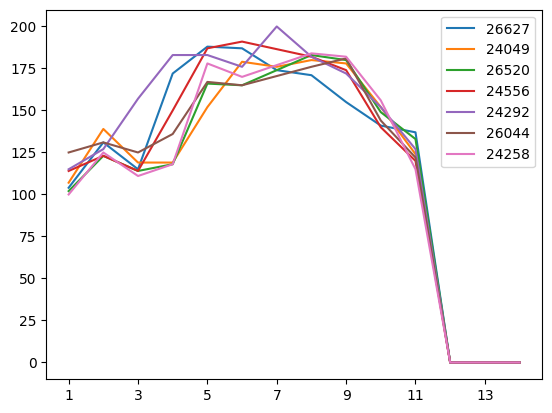

In [147]:
data[(data['crop']==2) & (data['last_fortnight'] ==11)].loc[:,'1':'14'].sample(7,random_state = 42).T.plot()

In [148]:
data[(data['crop']==2) & (data['last_fortnight'] ==11)].head()

1    2    3      4      5      6      7    8    9   10   11  12  13  \
24049  107  139  119  119.0  152.0  179.0  176.0  180  178  152  124   0   0   
24055  114  136  114  115.0  167.0  190.0  181.0  186  188  179  123   0   0   
24058  118  127  151  167.0  162.0  174.0  168.0  167  151  145  121   0   0   
24061  123  143  139  167.0  179.0  179.0  176.5  174  171  150  139   0   0   
24103  104  120  132  165.0  184.0  173.0  171.5  170  167  143  126   0   0   

       14  last_fortnight   sowing-harvest  crop  
24049   0              11  Oct_1FN-Feb_2FN     2  
24055   0              11  Oct_1FN-Feb_2FN     2  
24058   0              11  Oct_2FN-Mar_1FN     2  
24061   0              11  Oct_1FN-Feb_2FN     2  
24103   0              11  Oct_1FN-Feb_2FN     2

In [149]:
# Identify classes with only 1 member
class_counts = data.groupby(['crop', 'sowing-harvest']).size()
single_member_classes = class_counts[class_counts == 1].index

# Move instances from single-member classes to the train_1 set
train_1 = data[data.set_index(['crop', 'sowing-harvest']).index.isin(single_member_classes)]

# Remove these instances from the data set
data = data[~data.set_index(['crop', 'sowing-harvest']).index.isin(single_member_classes)]

# Splitting the data into train (60%) and temporary data (40%)
train, temp = train_test_split(data, test_size=0.40, stratify=data[['crop','sowing-harvest']],random_state=42)

# Identify classes with only 1 member
class_counts = temp.groupby(['crop', 'sowing-harvest']).size()
single_member_classes = class_counts[class_counts == 1].index

# Move instances from single-member classes to the val_1 set
val_1 = temp[temp.set_index(['crop', 'sowing-harvest']).index.isin(single_member_classes)]

# Remove these instances from the temporary set
temp = temp[~temp.set_index(['crop', 'sowing-harvest']).index.isin(single_member_classes)]

# Splitting the temporary data into validation (20%) and remaining test (20%)
val, test = train_test_split(temp, test_size=0.50,stratify=temp[['crop','sowing-harvest']] ,random_state=42)

# Concatenate the train data set with the val data set
train = pd.concat([train, train_1])
val = pd.concat([val, val_1])

In [150]:
display(train.head(),val.head(),test.head())

1    2    3      4      5      6      7    8    9  10  11  12  13  \
25451  118  152  179  193.0  189.0  185.0  176.0  166  120   0   0   0   0   
5189   123  155  178  183.0  181.0  181.0  165.0  126    0   0   0   0   0   
9108   116  125  162  187.0  182.0  190.0  190.0  177  133   0   0   0   0   
7510   123  137  182  190.0  190.0  192.0  192.0  184  124   0   0   0   0   
4632   123  200  188  191.0  188.0  191.0  185.0  158  115   0   0   0   0   

       14  last_fortnight   sowing-harvest  crop  
25451   0               9  Nov_1FN-Feb_2FN     2  
5189    0               8    nov_2f-feb_2f     1  
9108    0               9    nov_2f-mar_1f     1  
7510    0               9    nov_2f-mar_1f     1  
4632    0               9    nov_2f-mar_1f     1

1    2    3      4      5      6      7    8    9   10  11  12  13  \
7728   121  134  163  181.0  190.0  188.0  188.0  183  131    0   0   0   0   
19053  139  148  184  191.0  188.0  189.0  184.0  178  158  128   0   0   0   
17661  134  173  186  184.0  189.0  183.0  182.0  157  133    0   0   0   0   
15202  117  130  175  179.0  191.0  193.0  186.0  149  119    0   0   0   0   
9953   128  135  162  178.0  173.0  185.0  188.0  175  144  134   0   0   0   

       14  last_fortnight sowing-harvest  crop  
7728    0               9  nov_2f-mar_1f     1  
19053   0              10  nov_2f-mar_2f     1  
17661   0               9  dec_1f-mar_2f     1  
15202   0               9  dec_1f-mar_2f     1  
9953    0              10  nov_2f-mar_2f     1

1    2    3      4      5      6      7    8    9   10   11  12  13  \
22074  125  142  165  172.0  170.5  169.0  176.0  169  163  151  132   0   0   
25317  117  129  172  180.0  175.5  171.0  176.0  126    0    0    0   0   0   
2957   119  134  147  182.0  191.0  190.0  189.0  181  154  119    0   0   0   
2774   116  159  190  184.0  188.0  189.0  184.0  151  116    0    0   0   0   
16222  134  166  178  184.0  185.0  184.0  152.0  127    0    0    0   0   0   

       14  last_fortnight   sowing-harvest  crop  
22074   0              11    nov_1f-mar_2f     0  
25317   0               8  Nov_1FN-Feb_1FN     2  
2957    0              10    nov_1f-mar_1f     1  
2774    0               9    nov_2f-mar_1f     1  
16222   0               8    dec_2f-mar_2f     1

In [151]:
# # Create a list of your series
# series_list = [train['crop'], val['crop'], test['crop']]

# # Create a dictionary to store the percentages
# data_dict = {}

# # Iterate through the series and their corresponding names
# for series, series_name in zip(series_list, ['train', 'val', 'test']):
#     # Calculate the total number of values in the series
#     total_values = len(series)
    
#     # Initialize a dictionary to store percentages for this series
#     series_percentages = {}
    
#     # Get the unique values in the series
#     unique_values = series.unique()
    
#     # Iterate through unique values
#     for value in unique_values:
#         # Calculate the percentage of occurrences of the value in the series
#         percentage = (series == value).sum() / total_values * 100
#         series_percentages[value] = percentage
    
#     # Add the percentages for this series to the data_dict
#     data_dict[series_name] = series_percentages

# # Create the DataFrame from the data_dict
# df = pd.DataFrame(data_dict)

# # Fill NaN values with 0 (in case some values are missing in certain series)
# df = df.fillna(0)

# # Display the resulting DataFrame
# print(df.T)

In [154]:
train.crop.value_counts(normalize= True), val.crop.value_counts(normalize = True) , test.crop.value_counts(normalize=True)

(crop
 1    0.809093
 2    0.106148
 0    0.072415
 3    0.012344
 Name: proportion, dtype: float64,
 crop
 1    0.808503
 2    0.105919
 0    0.072567
 3    0.013011
 Name: proportion, dtype: float64,
 crop
 1    0.810687
 2    0.106317
 0    0.072163
 3    0.010834
 Name: proportion, dtype: float64)

In [155]:
train.drop(columns =['sowing-harvest'],axis=0,inplace = True)
val.drop(columns =['sowing-harvest'],axis=0,inplace = True)
test.drop(columns =['sowing-harvest'],axis=0,inplace = True)

In [156]:
train.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/train_6.csv',index=0)
val.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/val_6.csv',index=0)
test.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/test_6.csv',index=0)

In [157]:
train = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/train_6.csv')
test = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/test_6.csv')
val = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/val_6.csv')

type(train.loc[0][0])

numpy.float64

In [158]:
train.crop.value_counts(),val.crop.value_counts(),test.crop.value_counts()

(crop
 1    13240
 2     1737
 0     1185
 3      202
 Name: count, dtype: int64,
 crop
 1    4412
 2     578
 0     396
 3      71
 Name: count, dtype: int64,
 crop
 1    4415
 2     579
 0     393
 3      59
 Name: count, dtype: int64)